In [2]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading data
df = pd.read_csv('Car Sales Modified.csv')
df

,Date,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region,State
0,1/2/2022,Male,13500.0,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000.0,SUV,Middletown,New York
1,1/2/2022,Male,1480000.0,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000.0,SUV,Aurora,Colorado
2,1/2/2022,Male,1035000.0,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500.0,Passenger,Greenville,South Carolina
3,1/2/2022,Male,13500.0,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000.0,SUV,Pasco,Washington
4,1/2/2022,Male,1465000.0,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500.0,Hatchback,Janesville,Wisconsin
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,12/31/2023,Male,13500.0,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000.0,Passenger,Pasco,Washington
23902,12/31/2023,Female,900000.0,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000.0,Hardtop,Middletown,New York
23903,12/31/2023,Male,705000.0,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000.0,Sedan,Scottsdale,Arizona
23904,12/31/2023,Male,13500.0,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000.0,Passenger,Austin,Texas


In [4]:
# Data types
df.dtypes

,0
Date,object
Gender,object
Annual Income,float64
Dealer_Name,object
Company,object
Model,object
Engine,object
Transmission,object
Color,object
Price ($),float64


In [5]:
# Duplicate and null value check
print(df.duplicated().sum())
print(df.isnull().sum())

0
Date               0
Gender             0
 Annual Income     0
Dealer_Name        0
Company            0
Model              0
Engine             0
Transmission       0
Color              0
 Price ($)         0
Body Style         0
Dealer_Region      0
State              0
dtype: int64


Data kosong dan data duplikat kosong

In [6]:
df.columns

Index(['Date', 'Gender', ' Annual Income ', 'Dealer_Name', 'Company', 'Model',
       'Engine', 'Transmission', 'Color', ' Price ($) ', 'Body Style',
       'Dealer_Region', 'State'],
      dtype='object')

In [7]:
df.describe()

,Annual Income,Price ($)
count,2.390600e+04,23906.000000
mean,8.308403e+05,28090.247846
std,7.200064e+05,14788.687608
min,1.008000e+04,1200.000000
25%,3.860000e+05,18001.000000
50%,7.350000e+05,23000.000000
75%,1.175750e+06,34000.000000
max,1.120000e+07,85800.000000


## **DEMOGRAFI VS PREFERENSI MOBIL**

In [8]:
# Demographic vs preferensi mobil
demo = df[[ 'Gender', 'Model','Engine', 'Transmission', 'Color','Body Style']]

In [9]:
# demo['Color'].value_counts()

In [10]:
demo['Body Style'].value_counts()

,count
Body Style,
SUV,6374
Hatchback,6128
Sedan,4488
Passenger,3945
Hardtop,2971


In [11]:
# Jumlah penjualan model mobil berdasarkan gender
jumlah = demo.pivot_table(index='Model', columns='Gender', aggfunc='size', fill_value=0).reset_index(names='count')
jumlah['Total'] = jumlah['Female'] + jumlah['Male']

jumlah = jumlah.sort_values(by='Total', ascending=False).reset_index(drop=True)
jumlah.head(10)

Gender,count,Female,Male,Total
0,Diamante,83,335,418
1,Silhouette,70,341,411
2,Prizm,98,313,411
3,Passat,79,312,391
4,Ram Pickup,69,314,383
5,Jetta,85,297,382
6,RL,93,279,372
7,LS400,81,273,354
8,LHS,70,260,330
9,A6,56,273,329


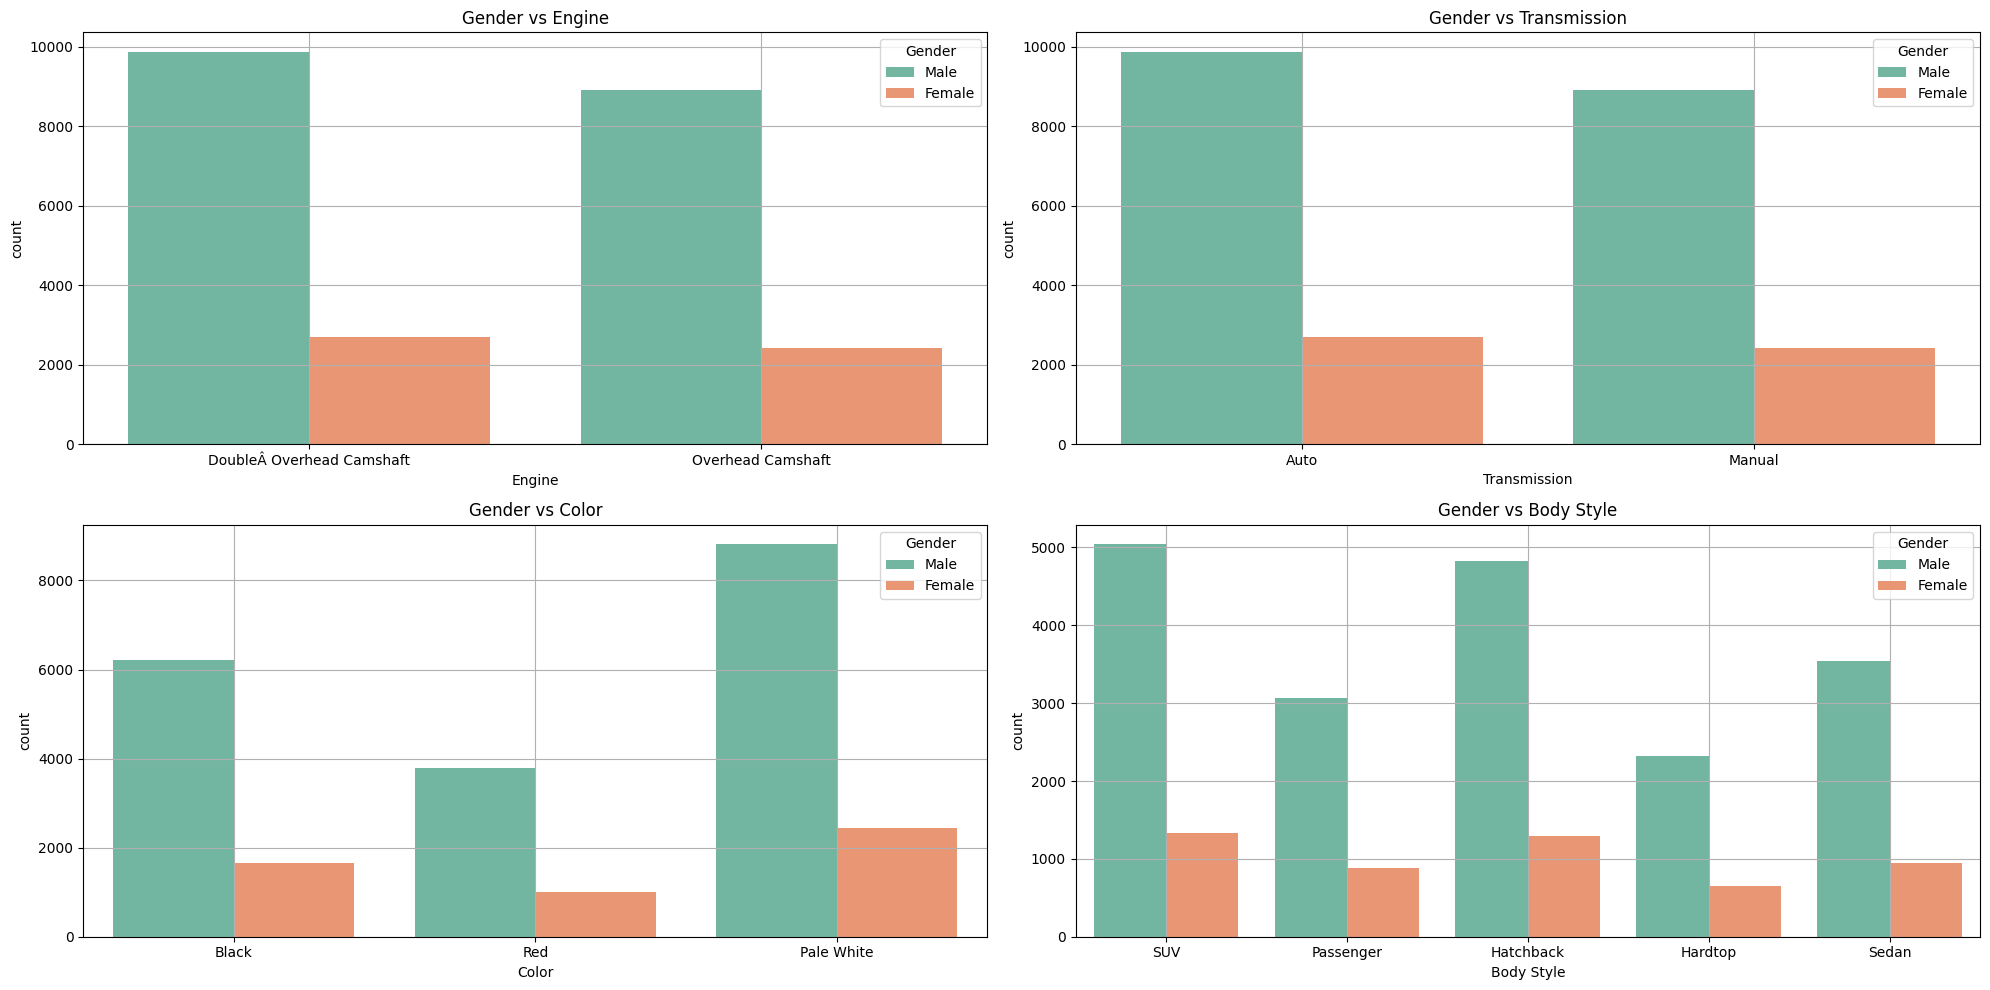

In [12]:
plt.figure(figsize=(20, 10))
for i, col in enumerate([ 'Engine', 'Transmission', 'Color', 'Body Style'], 1):
    plt.subplot(2, 2, i)  # grid 2x2
    sns.countplot(data=demo, x=col, hue='Gender', palette='Set2')
    # plt.xticks(rotation=45)
    plt.grid()
    plt.title(f'Gender vs {col}')

plt.tight_layout()
# plt.savefig('Gender vs Type',dpi=300)
plt.show()

In [13]:
# Pengaruh Pendapatan terhadap penjualan mobil
# income =df[' Annual Income '].

## **KINERJA PENJUALAN**

In [14]:
#  TOP 10 Model mobil yang paling banyak terjual?
modelterjual=df['Model'].value_counts().reset_index(name='Count').sort_values(by='Count', ascending=False)
print(modelterjual.head(10))
print(modelterjual.tail(10))



        Model  Count
0    Diamante    418
2       Prizm    411
1  Silhouette    411
3      Passat    391
4  Ram Pickup    383
5       Jetta    382
6          RL    372
7       LS400    354
8         LHS    330
9          A6    329
              Model  Count
144              A8     37
145          Accent     35
146  Town & Country     33
147       CLK Coupe     29
148             V40     22
149          Mirage     19
150           Alero     18
151           RX300     15
152          Avalon     15
153   Sebring Conv.     10


In [15]:
#Dealer mana yang memiliki penjualan tertinggi?
dealerterjual = df.groupby(['Dealer_Name','Dealer_Region']).size().reset_index(name='Count')
dealerterjual = dealerterjual.sort_values(by='Count', ascending=False).reset_index(drop=True)
print(dealerterjual.head(10))
print(dealerterjual.tail(10))


                                       Dealer_Name Dealer_Region  Count
0  Progressive Shippers Cooperative Association No    Janesville   1069
1                                    Race Car Help        Austin   1019
2                             Star Enterprises Inc         Pasco   1009
3                                 Saab-Belle Dodge        Aurora   1009
4                   Ryder Truck Rental and Leasing    Middletown   1008
5                                        U-Haul CO        Austin   1008
6                Scrivener Performance Engineering    Greenville   1006
7                                    Suburban Ford    Janesville   1004
8                             Rabun Used Car Sales    Scottsdale    950
9                               Tri-State Mack Inc    Scottsdale    915
                             Dealer_Name Dealer_Region  Count
186                          Capitol KIA         Pasco     12
187  Buddy Storbeck's Diesel Service Inc        Aurora     12
188                Ent

<ipython-input-16-59fcff92316d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dealerterjual.head(10), x='Count', y='Dealer_Name', palette='Blues_r')


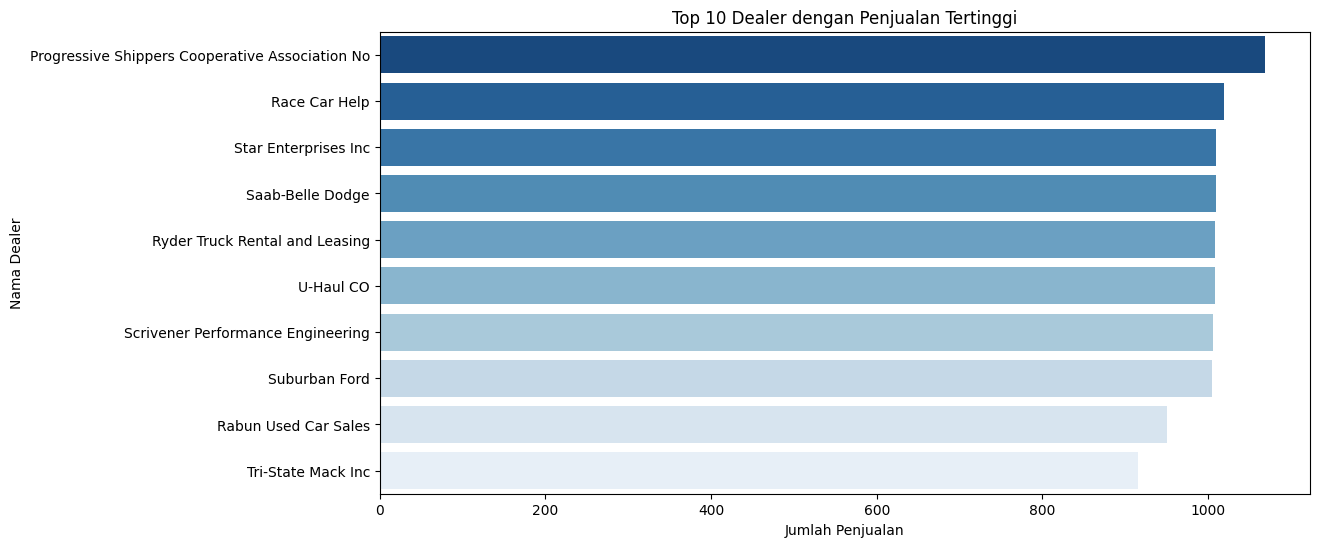

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(data=dealerterjual.head(10), x='Count', y='Dealer_Name', palette='Blues_r')

plt.xlabel("Jumlah Penjualan")
plt.ylabel("Nama Dealer")
plt.title("Top 10 Dealer dengan Penjualan Tertinggi")
plt.savefig('Top 10 Dealer.jpg',dpi=300)
plt.show()


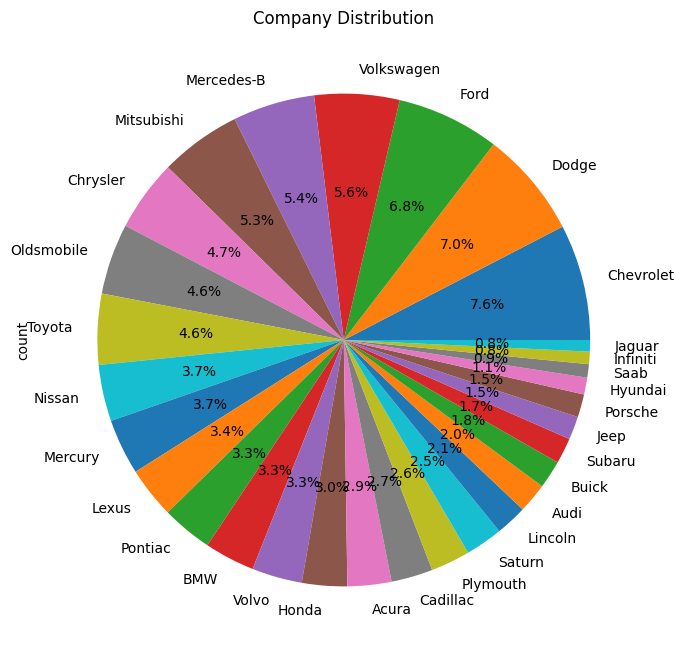

In [17]:
# Bagaimana distribusi penjualan per wilayah?
# Membuat pie chart untuk company
company_counts = df['Company'].value_counts()
company_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Company Distribution')
plt.savefig('Company Distribution.jpg',dpi=300)
plt.show()

### **TREN PENJUALAN**

In [18]:
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
df.dtypes

,0
Date,datetime64[ns]
Gender,object
Annual Income,float64
Dealer_Name,object
Company,object
Model,object
Engine,object
Transmission,object
Color,object
Price ($),float64


Penjualan bulanan:  Month
1      790
2      735
3     1535
4     1655
5     1895
6     1715
7     1725
8     1705
9     3305
10    1830
11    3470
12    3546
Name: count, dtype: int64


<ipython-input-20-b3a7d438c551>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x =df['Month'], hue=None, palette='CMRmap')
<ipython-input-20-b3a7d438c551>:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Jumlah Penjualan')


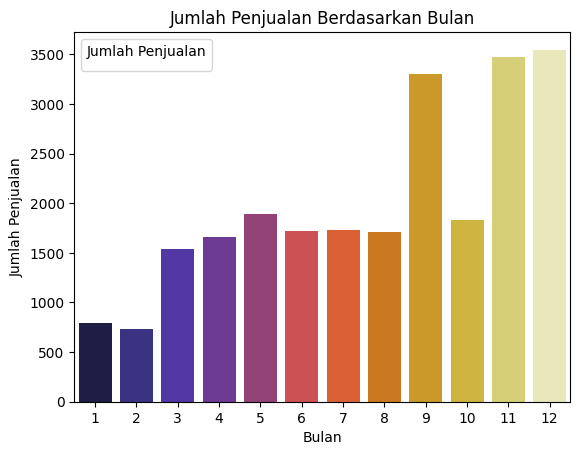

In [20]:
# Membuat trend penjualan
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# df['sales']=df['Price ($)'].count()

Monthly_sale=df['Month'].value_counts().sort_index()
print('Penjualan bulanan: ',Monthly_sale)

sns.countplot(data=df, x =df['Month'], hue=None, palette='CMRmap')
plt.title('Jumlah Penjualan Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penjualan')
plt.legend(title='Jumlah Penjualan')
# plt.savefig('Jumlah Penjualan Berdasarkan Bulan.jpg',dpi=300)
# plt.grid(True)
plt.show()

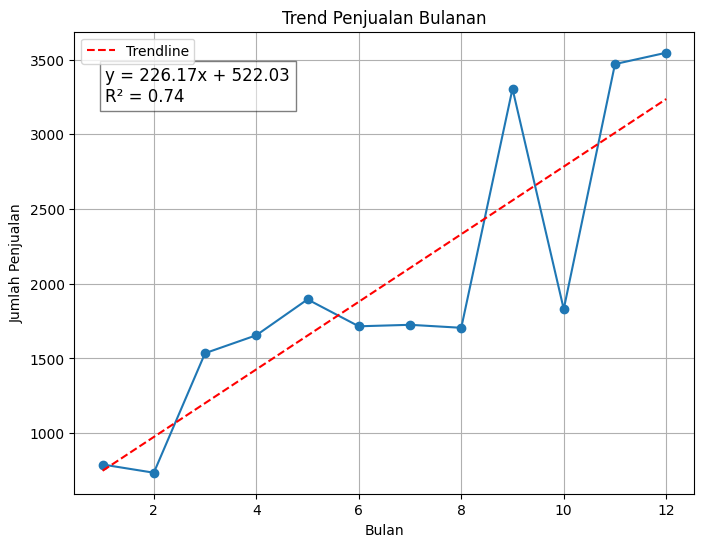

In [21]:
#Trend Penjualan
plt.figure(figsize=(8, 6))
plt.plot(Monthly_sale.index, Monthly_sale.values, marker='o', linestyle='-')

from scipy.stats import linregress
x = np.array(Monthly_sale.index)
y = np.array(Monthly_sale.values)
slope, intercept, r_value, p_value, std_err = linregress(x, y)
trendline = slope * x + intercept  # Rumus garis tren
plt.plot(Monthly_sale.index, trendline, color='red', linestyle='--', label="Trendline")  # Garis tren

equation = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}"
plt.text(0.05, 0.85, equation, transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.title('Trend Penjualan Bulanan')
plt.legend()
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penjualan')
plt.grid(True)
plt.savefig('Trend Penjualan Bulanan.jpg',dpi=300)
plt.show()

**HARGA DAN MARGIN KEUNTUNGAN**

In [22]:
df.columns

Index(['Date', 'Gender', ' Annual Income ', 'Dealer_Name', 'Company', 'Model',
       'Engine', 'Transmission', 'Color', ' Price ($) ', 'Body Style',
       'Dealer_Region', 'State', 'Year', 'Month', 'Day'],
      dtype='object')

In [23]:
SalesCount = df.groupby([' Price ($) ']).size().reset_index(name='Count')
SalesCount = SalesCount.sort_values(by='Count', ascending=False).reset_index(drop=True)
SalesCount.head(10)

,Price ($),Count
0,22000.0,1191
1,19000.0,974
2,21000.0,873
3,26000.0,689
4,18000.0,627
5,17000.0,621
6,16000.0,620
7,12000.0,619
8,31000.0,604
9,20000.0,533


In [24]:
SalesCount.tail(10)

,Price ($),Count
860,26690.0,1
861,26331.0,1
862,26301.0,1
863,26300.0,1
864,26150.0,1
865,26051.0,1
866,25951.0,1
867,25900.0,1
868,25751.0,1
869,85800.0,1


In [25]:
# Analisis Harga dan Margin Keuntungan
# Bagaimana pengaruh harga terhadap volume penjualan?-
# Apakah model dengan harga tertentu lebih diminati pelanggan?

SellByPrice = df.groupby([' Price ($) ','Company','Model']).size().reset_index(name='Count')
SellByPrice = SellByPrice.sort_values (by = 'Count',ascending=False).reset_index(drop=True)
SellByPrice.head(10)

,Price ($),Company,Model,Count
0,43000.0,Pontiac,Sunfire,88
1,22000.0,Subaru,Forester,83
2,17000.0,Acura,RL,77
3,19000.0,Mitsubishi,3000GT,77
4,20000.0,Chevrolet,Cavalier,76
5,25000.0,Volkswagen,GTI,70
6,17000.0,Volvo,S40,68
7,41000.0,Oldsmobile,Cutlass,67
8,21000.0,Mercury,Mountaineer,63
9,22000.0,Volkswagen,Jetta,62


In [26]:
SellByPrice.tail(10)

,Price ($),Company,Model,Count
3455,22350.0,Dodge,Ram Wagon,1
3456,22300.0,Volkswagen,Jetta,1
3457,22300.0,Mercury,Cougar,1
3458,22300.0,Lexus,LS400,1
3459,22300.0,Honda,CR-V,1
3460,22300.0,Dodge,Durango,1
3461,22251.0,Mitsubishi,Diamante,1
3462,22251.0,Ford,Taurus,1
3463,22250.0,Mercedes-B,CLK Coupe,1
3464,85800.0,Cadillac,Eldorado,1


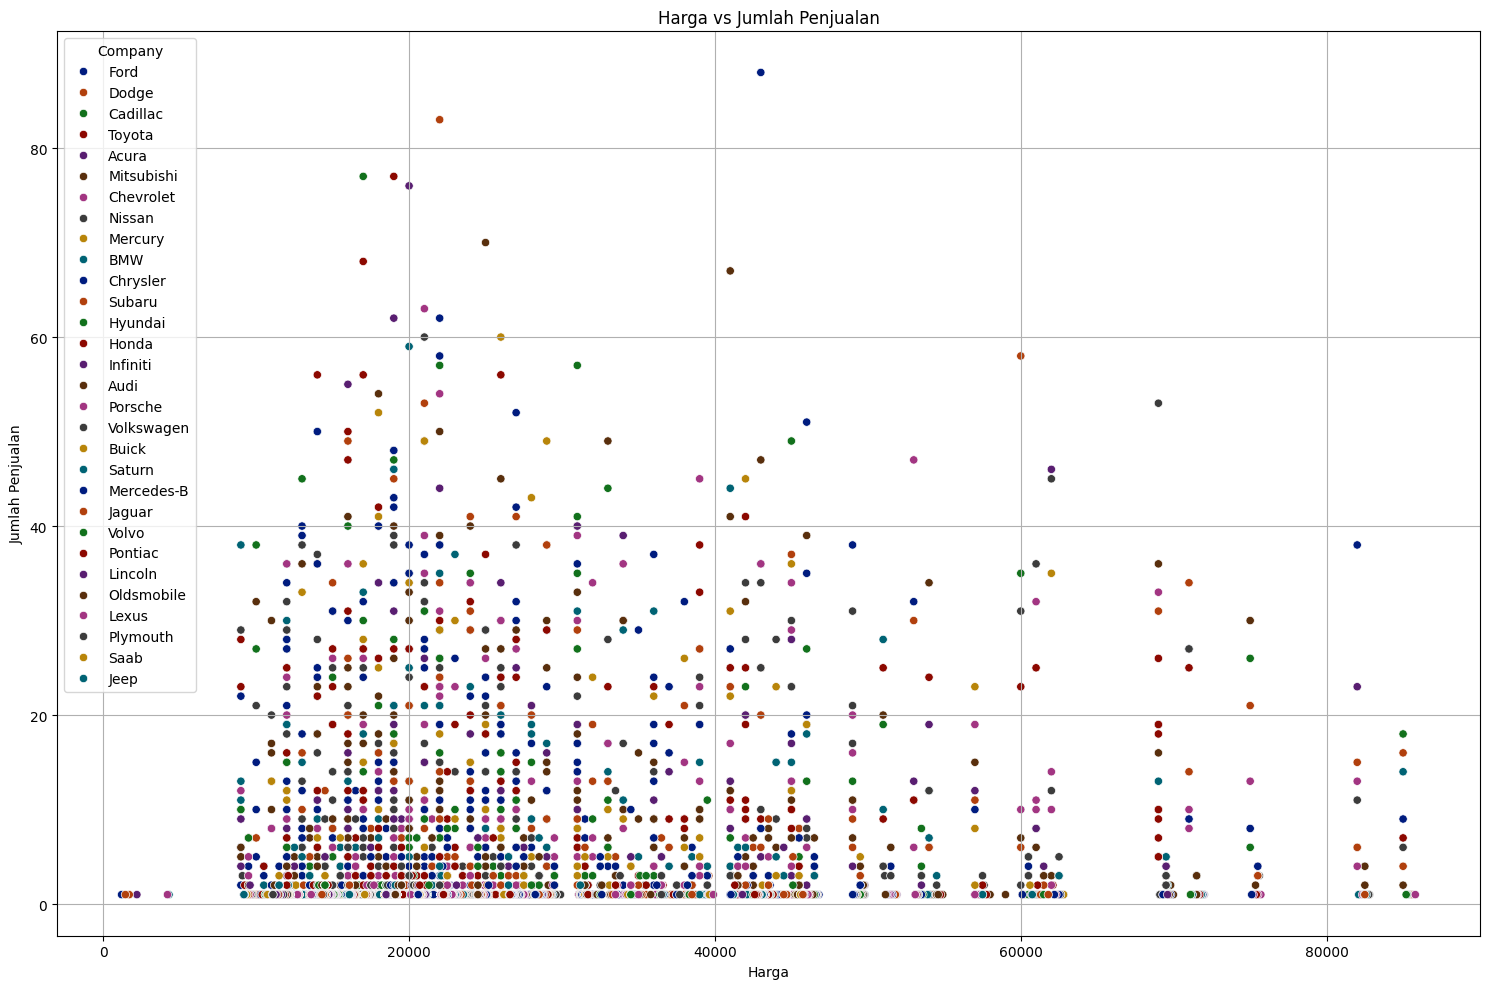

In [27]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=SellByPrice, x=' Price ($) ', y='Count',hue=df['Company'], palette='dark')
plt.title('Harga vs Jumlah Penjualan')
plt.xlabel('Harga')
plt.ylabel('Jumlah Penjualan')
plt.tight_layout()
plt.grid(True)
plt.savefig('Harga vs Jumlah Penjualan.jpg',dpi=300)
plt.show()


**INCOME TERHADAP PENJUALAN**

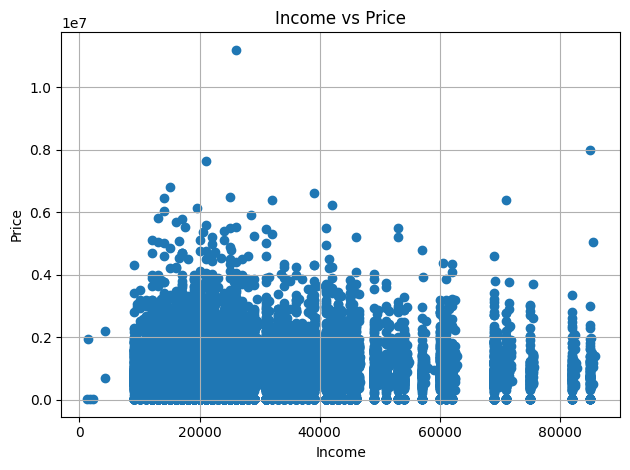

In [28]:
#Pengaruh Income terhadap Penjualan
income = df[' Annual Income ']
price = df[' Price ($) ']

plt.scatter(price, income)
plt.xlabel('Income')
plt.ylabel('Price')
plt.title('Income vs Price')
plt.grid(True)
plt.tight_layout()
# plt.savefig('Income vs Price.jpg',dpi=300)
plt.show()

In [29]:
max_income = df[' Annual Income '].max()
max_price = df[' Price ($) '].max()
min_income = df[' Annual Income '].min()
min_price = df[' Price ($) '].min()
print(max_income)
print(max_price)
print(min_income)
print(min_price)

11200000.0
85800.0
10080.0
1200.0


In [30]:
salebyincome=df.groupby(' Annual Income ').size().reset_index(name='Count').sort_values(by='Count', ascending=False)
Top10SaleByIncome=salebyincome.head(10).reset_index(drop=True)
Top10SaleByIncome

,Annual Income,Count
0,13500.0,5273
1,1100000.0,162
2,600000.0,160
3,800000.0,151
4,1300000.0,148
5,1200000.0,142
6,650000.0,141
7,1000000.0,133
8,900000.0,132
9,700000.0,128


<ipython-input-31-4bcae16e8c76>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Top10SaleByIncome, y='Count', x=' Annual Income ', palette='Blues_r')


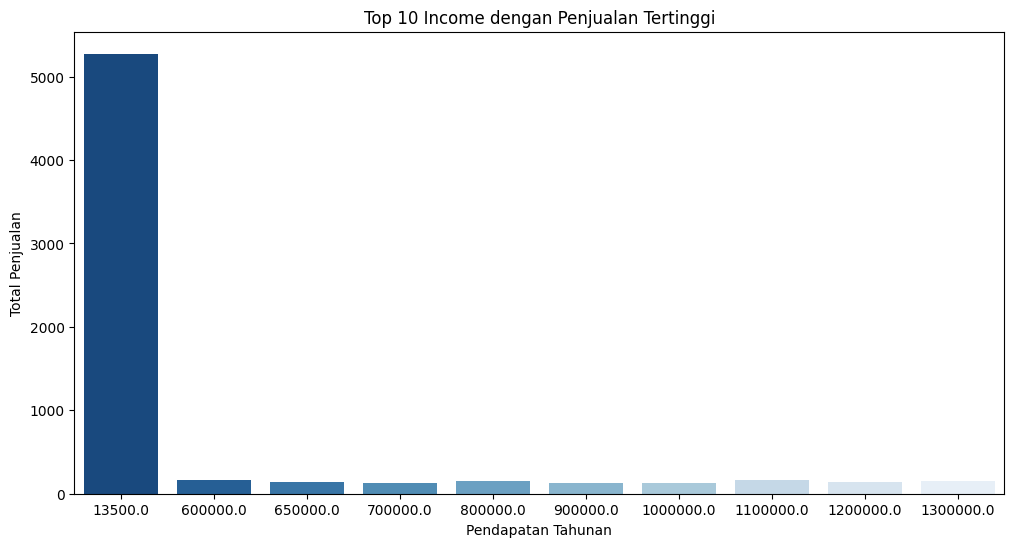

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(data=Top10SaleByIncome, y='Count', x=' Annual Income ', palette='Blues_r')

plt.xlabel("Pendapatan Tahunan")
plt.ylabel("Total Penjualan")
plt.title("Top 10 Income dengan Penjualan Tertinggi")
plt.savefig('Top 10 Income.jpg',dpi=300)
plt.show()

In [34]:
SellByPrice = df.groupby([' Price ($) ','Company','Model']).size().reset_index(name='Count')
SellByPrice = SellByPrice.sort_values (by = 'Count',ascending=False).reset_index(drop=True)
SellByPrice.head(10)

,Price ($),Company,Model,Count
0,43000.0,Pontiac,Sunfire,88
1,22000.0,Subaru,Forester,83
2,17000.0,Acura,RL,77
3,19000.0,Mitsubishi,3000GT,77
4,20000.0,Chevrolet,Cavalier,76
5,25000.0,Volkswagen,GTI,70
6,17000.0,Volvo,S40,68
7,41000.0,Oldsmobile,Cutlass,67
8,21000.0,Mercury,Mountaineer,63
9,22000.0,Volkswagen,Jetta,62
